# **LOAD AND CLEAN DATA**




**IMPORT STANDARD LIBRARIES**

In [70]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**IMPORT ML TOOLS FOR A SIMPLE BASELINE MODEL**

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

**LOAD TRADER DATA AND SENTIMENT DATA FROM CSV FILE**

In [73]:
trader_df = pd.read_csv('/content/historical_data.csv')
trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [74]:
sentiment_df = pd.read_csv('/content/fear_greed_index.csv')
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


**CONVERT 'time' COLUMN IN TRADER DATA TO DATETIME FORMAT**

In [75]:
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M', dayfirst=True)
trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


**ONVERT 'Date' COLUMN IN SENTIMENT DATA TO DATETIME FORMAT**

In [76]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


**CONVERT 'time' COLUMN IN SENTIMENT DATA TO DATETIME FORMAT**

In [77]:
sentiment_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M', dayfirst=True)
sentiment_df.head()

,timestamp,value,classification,date,Timestamp IST
0,1517463000,30,Fear,2018-02-01,2024-12-02 22:50:00
1,1517549400,15,Extreme Fear,2018-02-02,2024-12-02 22:50:00
2,1517635800,40,Fear,2018-02-03,2024-12-02 22:50:00
3,1517722200,24,Extreme Fear,2018-02-04,2024-12-02 22:50:00
4,1517808600,11,Extreme Fear,2018-02-05,2024-12-02 22:50:00


**RENAME CLASSIFICATION COLUMN TO 'Sentiment' FOR CONSISTENCY**

In [78]:
sentiment_df.rename(columns={'classification': 'Sentiment'}, inplace=True)
sentiment_df.head()

,timestamp,value,Sentiment,date,Timestamp IST
0,1517463000,30,Fear,2018-02-01,2024-12-02 22:50:00
1,1517549400,15,Extreme Fear,2018-02-02,2024-12-02 22:50:00
2,1517635800,40,Fear,2018-02-03,2024-12-02 22:50:00
3,1517722200,24,Extreme Fear,2018-02-04,2024-12-02 22:50:00
4,1517808600,11,Extreme Fear,2018-02-05,2024-12-02 22:50:00


**CREATE A DATE-ONLY COLUMN IN TRADER DATA FOR MERGING**

In [79]:
trader_df['date'] = trader_df['Timestamp IST'].dt.date
trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


**MERGE BOTH DATASETS ON THE 'Date' COLUMN (LEFT JOIN TO KEEP ALL TRADES)**

In [80]:
trader_df['date'] = pd.to_datetime(trader_df['date'])
merged_df = pd.merge(trader_df, sentiment_df, on='date', how='left')
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST_x,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,Sentiment,Timestamp IST_y
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2025-02-14 00:31:00
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2025-02-14 00:31:00
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2025-02-14 00:31:00
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2025-02-14 00:31:00
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2025-02-14 00:31:00


**FILL ANY MISSING SENTIMENT VALUES WITH 'Unknown'**

In [81]:
merged_df['Sentiment'] = merged_df['Sentiment'].fillna('Unknown')
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST_x,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,Sentiment,Timestamp IST_y
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2025-02-14 00:31:00
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2025-02-14 00:31:00
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2025-02-14 00:31:00
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2025-02-14 00:31:00
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2025-02-14 00:31:00


# **FEATURE ENGINEERING**

**CREATE PROFIT CATEGORY BASED ON 'closedPnL' VALUES**

In [82]:
merged_df['Profit_Category'] = pd.cut(
    merged_df['Closed PnL'],
    bins=[-float('inf'), 0, 100, 1000, float('inf')],
    labels=['Loss', 'Low Profit', 'Medium Profit', 'High Profit']
)
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST_x,Start Position,Direction,Closed PnL,...,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,Sentiment,Timestamp IST_y,Profit_Category
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2025-02-14 00:31:00,Loss
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2025-02-14 00:31:00,Loss
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2025-02-14 00:31:00,Loss
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2025-02-14 00:31:00,Loss
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2025-02-14 00:31:00,Loss


**MAP TRADE DIRECTION: 'buy' -> 'Long', 'sell' -> 'Short'**

In [83]:
merged_df['Direction'] = merged_df['Side'].map({'BUY': 'Long', 'SELL': 'Short'})
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST_x,Start Position,Direction,Closed PnL,...,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,Sentiment,Timestamp IST_y,Profit_Category
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Long,0.0,...,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2025-02-14 00:31:00,Loss
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Long,0.0,...,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2025-02-14 00:31:00,Loss
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Long,0.0,...,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2025-02-14 00:31:00,Loss
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Long,0.0,...,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2025-02-14 00:31:00,Loss
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Long,0.0,...,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2025-02-14 00:31:00,Loss


**EXTRACT HOUR OF TRADE FROM 'time' COLUMN**

In [84]:
merged_df['Hour'] = pd.to_datetime(merged_df['Timestamp']).dt.hour
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST_x,Start Position,Direction,Closed PnL,...,Fee,Trade ID,Timestamp,date,timestamp,value,Sentiment,Timestamp IST_y,Profit_Category,Hour
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Long,0.0,...,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2025-02-14 00:31:00,Loss,0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Long,0.0,...,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2025-02-14 00:31:00,Loss,0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Long,0.0,...,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2025-02-14 00:31:00,Loss,0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Long,0.0,...,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2025-02-14 00:31:00,Loss,0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Long,0.0,...,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2025-02-14 00:31:00,Loss,0


In [109]:
merged_df['PnL_Category'] = pd.cut(
    merged_df['Closed PnL'],
    bins=[-float('inf'), 0, 100, 1000, float('inf')],
    labels=['Loss', 'Low Profit', 'Medium Profit', 'High Profit']
)
print("\nFEATURE ENGINEERING COMPLETE - SAMPLE:")
print(merged_df[['Closed PnL', 'PnL_Category', 'Side', 'Direction', 'Hour']].head())


FEATURE ENGINEERING COMPLETE - SAMPLE:
   Closed PnL PnL_Category Side Direction  Hour
0         0.0         Loss  BUY      Long     0
1         0.0         Loss  BUY      Long     0
2         0.0         Loss  BUY      Long     0
3         0.0         Loss  BUY      Long     0
4         0.0         Loss  BUY      Long     0


# **EXPLORATORY DATA ANALYSIS (EDA)**

In [87]:
output_dir = '/content/outputs/'
os.makedirs(output_dir, exist_ok=True)

**🟠 SENTIMENT DISTRIBUTION**

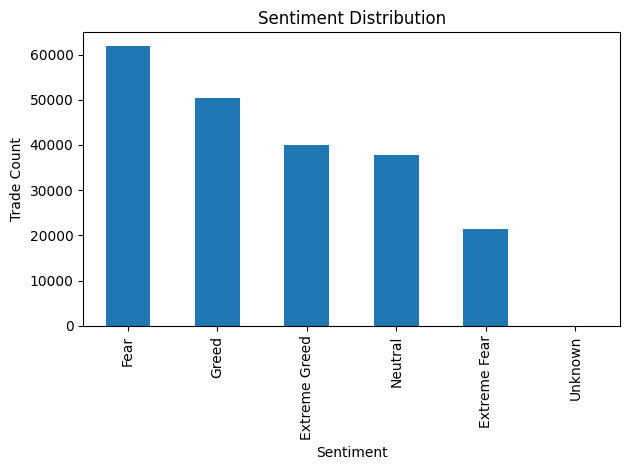

In [88]:
sentiment_counts = merged_df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', title='Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Trade Count')
plt.tight_layout()
plt.savefig(output_dir + 'sentiment_distribution.png')
plt.show()

**🟢 PNL BY SENTIMENT**

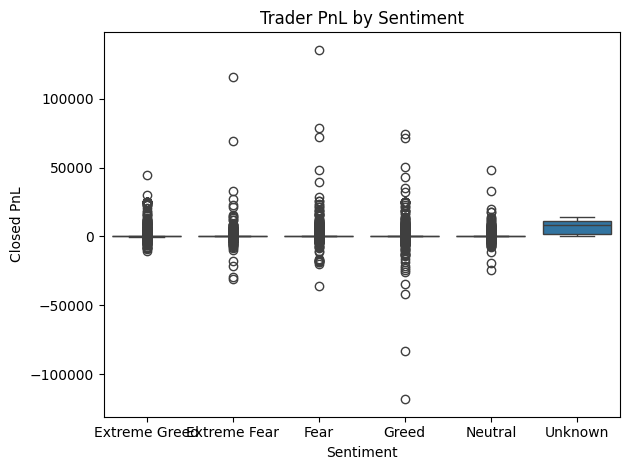

In [90]:
sns.boxplot(data=merged_df, x='Sentiment', y='Closed PnL')
plt.title("Trader PnL by Sentiment")
plt.xlabel('Sentiment')
plt.ylabel('Closed PnL')
plt.tight_layout()
plt.savefig(output_dir + 'pnl_by_sentiment.png')
plt.show()

**🔵 TRADE SIZE VS SENTIMENT**

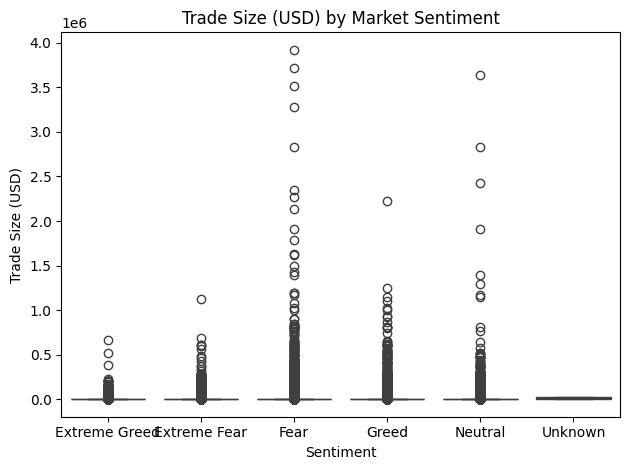

In [92]:
sns.boxplot(data=merged_df, x='Sentiment', y='Size USD')
plt.title("Trade Size (USD) by Market Sentiment")
plt.xlabel('Sentiment')
plt.ylabel('Trade Size (USD)')
plt.tight_layout()
plt.savefig(output_dir + 'trade_size_vs_sentiment.png')
plt.show()

# **GENERATE KEY INSIGHTS FOR REPORT**

**CREATE A LIST TO STORE INSIGHTS**

In [93]:
insights = []

**1️⃣ MOST COMMON SENTIMENT**

In [94]:
most_common_sentiment = merged_df['Sentiment'].value_counts().idxmax()
insights.append(f"Most common market sentiment in the dataset: {most_common_sentiment}")

**HIGHEST & LOWEST AVERAGE PNL BY SENTIMENT**

In [96]:
avg_pnl_by_sentiment = merged_df.groupby('Sentiment')['Closed PnL'].mean().sort_values(ascending=False)
top_sentiment = avg_pnl_by_sentiment.index[0]
bottom_sentiment = avg_pnl_by_sentiment.index[-1]
insights.append(f"Highest average Closed PnL occurs during '{top_sentiment}' sentiment ({avg_pnl_by_sentiment.iloc[0]:.2f}).")
insights.append(f"Lowest average Closed PnL occurs during '{bottom_sentiment}' sentiment ({avg_pnl_by_sentiment.iloc[-1]:.2f}).")

**3️⃣ LEVERAGE TRENDS**

In [98]:
avg_trade_size_by_sentiment = merged_df.groupby('Sentiment')['Size USD'].mean().sort_values(ascending=False)
highest_trade_size_sentiment = avg_trade_size_by_sentiment.index[0]
insights.append(f"Traders use highest average trade size during '{highest_trade_size_sentiment}' sentiment ({avg_trade_size_by_sentiment.iloc[0]:.2f} USD).")

**4️⃣ WIN RATE BY SENTIMENT**

In [100]:
merged_df['Win'] = (merged_df['Closed PnL'] > 0).astype(int)
win_rate_by_sentiment = merged_df.groupby('Sentiment')['Win'].mean().sort_values(ascending=False) * 100
highest_win_rate_sentiment = win_rate_by_sentiment.index[0]
insights.append(f"Highest win rate is during '{highest_win_rate_sentiment}' sentiment ({win_rate_by_sentiment.iloc[0]:.2f}%).")

**5️⃣ PEAK TRADING HOURS**

In [101]:
peak_hour = merged_df['Hour'].value_counts().idxmax()
insights.append(f"Most trades occur at hour {peak_hour}:00.")

In [107]:
print("\n=== KEY INSIGHTS ===")
for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")


=== KEY INSIGHTS ===
1. Most common market sentiment in the dataset: Fear
2. Highest average Closed PnL occurs during 'Unknown' sentiment (7078.67).
3. Lowest average Closed PnL occurs during 'Neutral' sentiment (34.31).
4. Traders use highest average trade size during 'Unknown' sentiment (14778.14 USD).
5. Highest win rate is during 'Unknown' sentiment (100.00%).
6. Most trades occur at hour 0:00.


In [108]:
output_dir = '/content/outputs/'
os.makedirs(output_dir, exist_ok=True)

with open(output_dir + 'key_insights.txt', 'w') as f:
    for i, insight in enumerate(insights, 1):
        f.write(f"{i}. {insight}\n")

print(f"\nINSIGHTS SAVED TO {output_dir}key_insights.txt")


INSIGHTS SAVED TO /content/outputs/key_insights.txt
